<a href="https://colab.research.google.com/github/SwatiPatil2019/HealthRiskAssessement/blob/master/HealthAssesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for Breast-Cancer Survival rate  

# Table of Contents<br>
[1.Problem Statement](#Problem Statement)<br>
    [1.1Introduction](#Introduction)<br>
    [1.2Dataset Description](#Dataset Description)<br>
    [1.3Some Background Information](#Some Background Information)<br><br>
[2.Load the packages and data](#Load the packages and data)<br><br>
[3.Data Profiling](#Data Profiling)<br>
  [3.1 Information](#Info)<br>
  [3.2 head](#head)<br>
  [3.3 describe](#describe)<br>
  [3.4 sample](#sample)<br>
  [3.5 Pandas Profiling](#Pandas Profiling)<br>
  [3.6 Initial observations](#Initial observations)<br><br>
[4.Data Normalization](#Data Normalization)<br>
  [4.1 Removing Duplicate rows](#Removing Duplicate rows)<br>
  [4.2 Outlier Treatment](#Outlier Treatment)<br><br>
[5.Identify patterns in the data](#Identify patterns in the data)<br>
  [5.1 SubPlot](#SubPlot)<br>
  [5.2 Univariant Analysis](#univariant Analysis)<br>
  [5.3 Years_of_Operation Vs Status](#Years_of_Operation Vs Status)<br>
  [5.4 Pos_axillary Vs Age](#Pos_axillary Vs Age)<br>
  [5.5 Seaborn swarm plot](#Seaborn swarm plot)<br>
  [5.6 Seaborn catplot](#Seaborn catplot)<br>
  [5.7 Correlation among all attributes using BoxPlot](#Correlation among all attributes using BoxPlot)<br>
  [5.8 Correlation among all variables using Heap Map](#Correlation among all variables using Heap Map)<br>    
[6.Analysis through questions](#Analysis through questions)<br>
  [6.1 Of all patients how many survived less than 5 years and more than 5 years or longer](#Of all patients how many survived less than 5 years and more than 5 years or longer)<br>
  [6.2 Bar graph to find the frequency of people survived less than 5 years and more.](#Bar graph to find the frequency of people survived less than 5 years and more)<br>
  [6.3 Divide the age into different group by using binning](#Divide the age into different group by using binning)<br>
  [6.4 Finding the percentage of different age groups patients and how many patients survived 5yrs or longer](#Finding the percentage of different age groups patients and how many patients survived 5yrs or longer)  
  [6.5 How many survived whose pos_axillary nodes less than 5](#How many survived whose pos_axillary nodes less than 5)<br>
  [6.6 Under which pos_axillary-nodes maximum patients identified ](#Under which pos_axillary-nodes maximum patients identified)<br>
  [6.7 Whats the survival rate as the pos_auxillary_nodes increases](#Whats the survival rate as the pos_auxillary_nodes increases)<br>
[7.Final Conclusion ](#Final Conclusion)<br>      

##  1.Problem Statement  <a class="anchor" id="Problem Statement"></a>


The dataset comprises of the study cases on the survival of patients who had undergone surgery for breast cancer. Study is done at the University of Chicago's Billings Hospital and cases are from 1958 till 1970.

##  1.1 Introduction<a class="anchor" id="Introduction"></a>

Exploratory data analysis (EDA) is an important step of Data Science that allows you to develop the gist of what your data look like and what kind of questions might be answered. Also, it allows the Data Scientist to make critical decisions about what is interesting to pursue and what probably isn’t worth following up on and thus building a hypothesis using the relationships between variables.
<br>
Important points are; <br>
1.Data Cleaning<br>
2.Defining questions<br>
3.Effective Visualizations.

## 1.2 Dataset Description  <a class="anchor" id="Dataset Description"></a>

The dataset comprises of the information about people suffering from breast cancer who survived 5years or longer or died with in 5years.Various variables present in the dataset includes data of age, Pos_axillary_nodes ,Years of operations,status etc. 
It comprises of 306 observations of 4 columns. Below is a table showing names of all the columns and their description.

1. Age : Denotes age of the patient <br>
2. Pos_axillary_nodes : No of lymphs nodes <br>
3. Years_of_Operations : Year of operation done <br>
4. Status : Patient survived or not 

 ## 1.3 Some Background Information  <a class="anchor" id="Some Background Information"></a>

More women are diagnosed with breast cancer than any other cancer, 5-year survival rate tells you what percent of people live at least 5 years after the cancer is found. Percent means how many out of 100. The average 5-year survival rate for women with invasive breast cancer is 90%. The average 10-year survival rate is 83%.
If the cancer is located only in the breast, the 5-year survival rate of women with breast cancer is 99%. Sixty-two percent (62%) of cases are diagnosed at this stage. If the cancer has spread to the regional lymph nodes, the 5-year survival rate is 85%. If the cancer has spread to a distant part of the body, the 5-year survival rate is 27%.
<br>
It is important to note that these statistics are averages, and each person’s risk depends on many factors, including the size of the tumor, the number of lymph nodes that contain cancer.
<br>
TNM stands for Tumour, Node, Metastasis. This system describes the size of the initial cancer (the primary tumour), whether the cancer has spread to the lymph nodes, and whether it has spread to a different part of the body (metastasised). <br> The system uses letters and numbers to describe the cancer:<br>
T refers to the size of the cancer and how far it has spread into nearby tissue – it can be 1, 2, 3 or 4, with 1 being small and 4 large 
<br>
N refers to whether the cancer has spread to the lymph nodes – it can be between 0 (no lymph nodes containing cancer cells) and 3 (lots of lymph nodes containing cancer cells)
<br>
M refers to whether the cancer has spread to another part of the body – it can either be 0 (the cancer hasn't spread) or 1 (the cancer has spread)
<br>
So, for example, a small cancer that has spread to the lymph nodes but not to anywhere else in the body may be T2 N1 M0. Or a more advanced cancer that has spread may be T4 N3 M1.

# 2. Load the packages and data  <a class="anchor" id="Load the packages and data"></a>

In [0]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
breast_data = pd.read_csv("Breast_cancer.csv")     # Importing training dataset using pd.read_csv


 # 3  Data Profiling  <a class="anchor" id="Data Profiling"></a>

## 3.1 Information  <a class="anchor" id="Information"></a>

In [33]:
breast_data.info()  # This will print the number of rows and comlumns of the Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 306 non-null    int64
 1   Years_of_Operation  306 non-null    int64
 2   Pos_axillary_nodes  306 non-null    int64
 3   Status              306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## 3.2 head <a class="anchor" id="head"></a>

In [34]:
breast_data.head()    # This will print the first n rows of the Data Frame

,Age,Years_of_Operation,Pos_axillary_nodes,Status
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


## 3.3 describe <a class="anchor" id="describe"></a>

In [35]:
breast_data.describe()

,Age,Years_of_Operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,1962.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,1958.000000,0.000000,1.000000
25%,44.000000,1960.000000,0.000000,1.000000
50%,52.000000,1963.000000,1.000000,1.000000
75%,60.750000,1965.750000,4.000000,2.000000
max,83.000000,1969.000000,52.000000,2.000000


## 3.4 sample  <a class="anchor" id="sample"></a>

In [36]:
breast_data.sample()

,Age,Years_of_Operation,Pos_axillary_nodes,Status
15,35,1963,0,1


In [37]:
breast_data.tail()

,Age,Years_of_Operation,Pos_axillary_nodes,Status
301,75,1962,1,1
302,76,1967,0,1
303,77,1965,3,1
304,78,1965,1,2
305,83,1958,2,2


In [38]:
breast_data.isnull().sum()

Age                   0
Years_of_Operation    0
Pos_axillary_nodes    0
Status                0
dtype: int64

## 3.5 Pandas Profiling  <a class="anchor" id="Pandas Profiling"></a>

In [39]:
data_profile = pandas_profiling.ProfileReport(breast_data)
data_profile.to_file(outputfile="Breast_data_Before_preprocessing.html")

TypeError: ignored

## 3.6 Intial Observation  <a class="anchor" id="Intial Observation"></a>

1. Data does not contain any missing value<br> 
2. Replacing Years_of_operations with a prefix value '19'.<br> 
3. 17 Duplicates row are observed are dropped.<br>
4. Outliers are observed from the dataset<br>
5. Observed that the patient who had less auxillary nodes had survived more 
6. From the background information, we can say if zero lymphs nodes are found then small cancer that has spread to the lymph nodes but not to anywhere else in the body   

**Patients who survived more than 5 years**

In [0]:
survived_more_than_5 = breast_data[breast_data['Status']==1]
survived_more_than_5.describe()

<b>Observation</b> : Out Of 306, 225 people survived more than 5 years after operation.

**Patients who survived less than 5 years**

In [0]:
survived_less_than_5 = breast_data[breast_data.Status==2]
survived_less_than_5.describe()

<b>Observation</b> : Out Of 306, 81 people survived less than 5 years after operation.

# 4 Data Normalization  <a class="anchor" id="Data Normalization"></a>

## 4.1 Removing Duplicate rows <a class="anchor" id="Removing Duplicate rows"></a>

In [0]:
breast_data = breast_data.drop_duplicates(keep='first')

## 4.2 Outlier Treatment<a class="anchor" id="Outlier Treatment"></a>

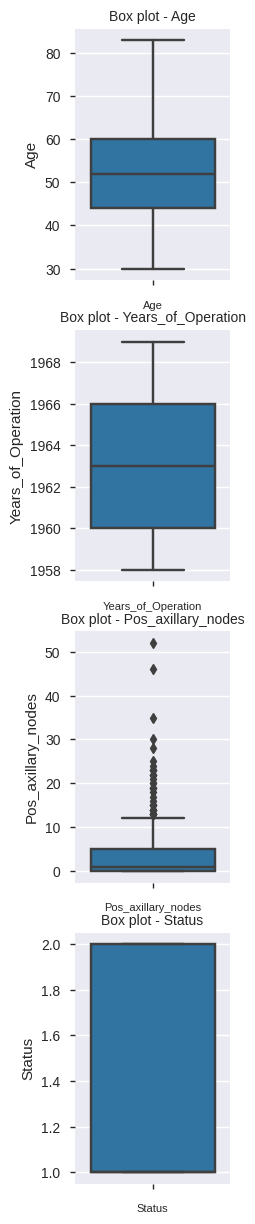

In [41]:

col_names = ['Age','Years_of_Operation','Pos_axillary_nodes','Status']

fig, ax = plt.subplots(len(col_names),figsize=(2,15))

for i, col_val in enumerate(col_names):
    sns.boxplot(y=breast_data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize = 10)
    ax[i].set_xlabel(col_val, fontsize = 8)

plt.show()

<b>Observation</b> : Outliers exist in pos_axillary_nodes column.

**Percentage type outlier treatment for better identifcation**

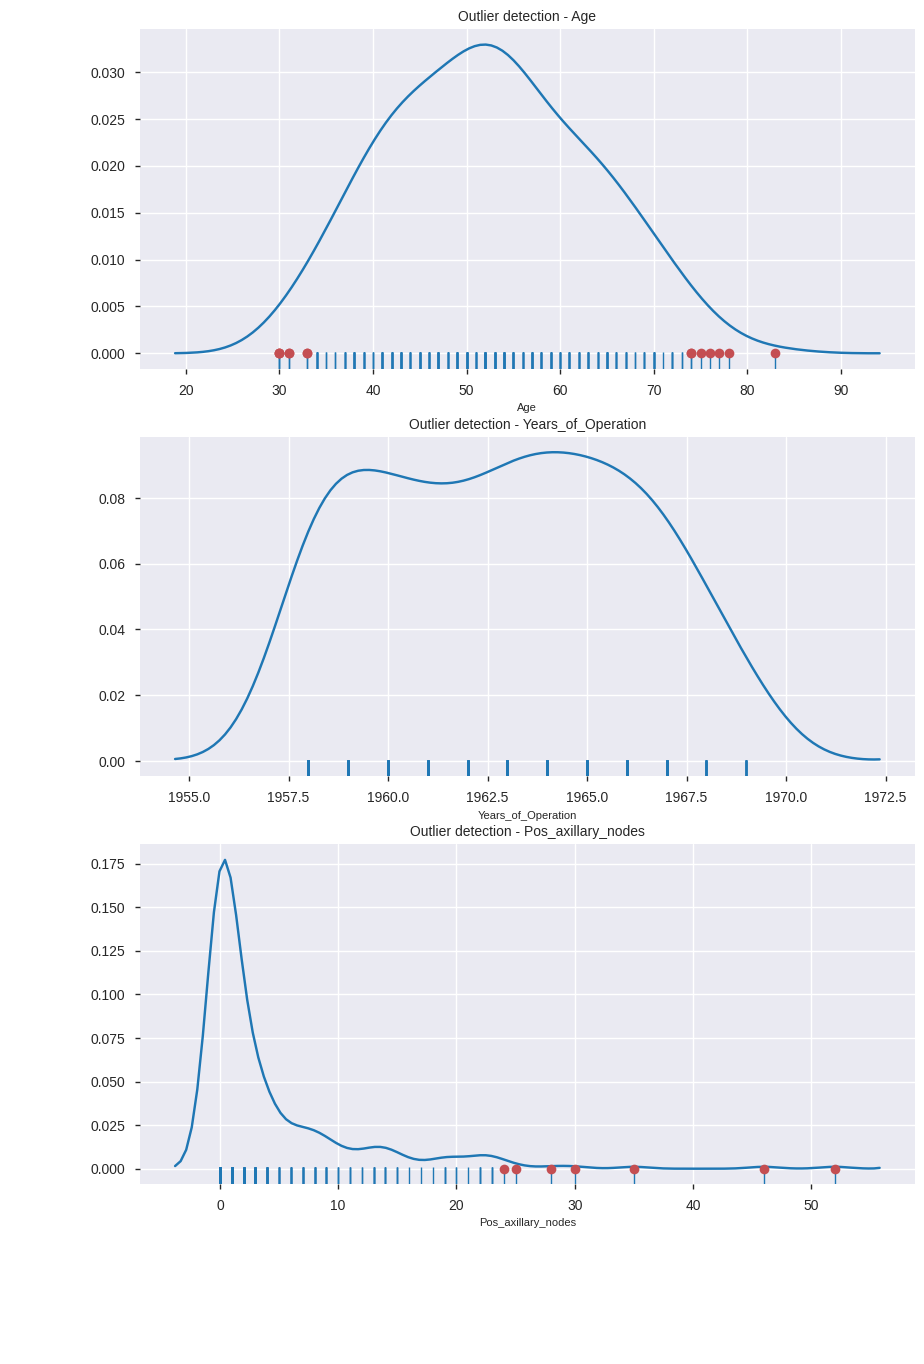

In [42]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['Age','Years_of_Operation','Pos_axillary_nodes']

fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):
    x = breast_data[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

**Observations**<br>
In the <b>Pos_axillary_node</b> data is right skewed. We will replace the outliers with 3rd Quartile value instead of replacing it with NAN or removing the rows to remove the right skewness<br>
In the <b>Age</b> column outliers are found at age below 34 and age above 76. We will replace Age value which is less than 33 or more than 76 with zero values.

In [43]:
def age_clean(age):
    if (age > 33) and (age < 76):
        return age
    else:
        return 0
breast_data['Age_clean'] = breast_data['Age'].apply(age_clean)   
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
breast_data['Age_clean'].median()

52.0

**In Age column replace out-of-range values with 0, rather than dropping the rows from the data set.Here we have 11 rows out_of_range values**

In [45]:
breast_data['Age_clean']=breast_data['Age_clean'].replace(0,breast_data['Age_clean'].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Replaced all the Zero row value with median value instead of dropping the rows**

In [46]:
breast_data.drop('Age',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Observations**<br>
Outliers can be seen more in Status=1 those patients who survived 5years or longer.<br>
Outliers found in Status=2,remove those two rows from the dataset where the patients who survived less than 5years<br>


**Dropped two rows from dataset where Pos_axillary_nodes value equal to 35 and 52 and Status=2** 

In [0]:
breast_data = breast_data.drop(breast_data[breast_data.Pos_axillary_nodes == 35].index)

In [0]:
breast_data = breast_data.drop(breast_data[breast_data.Pos_axillary_nodes == 52].index)

**Finding 80th percentile value and replacing the pos_axillary nodes with that value inorder to remove outliers from data** 

In [49]:
  
q1,q3=np.percentile(breast_data['Pos_axillary_nodes'],[25,75])
iqr=q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
q1,q3=np.percentile(breast_data['Pos_axillary_nodes'],[25,75])
q4=np.percentile(breast_data['Pos_axillary_nodes'],[80])
q4    

array([7.])

In [0]:
breast_data['Pos_axillary_nodes'] = np.where(breast_data['Pos_axillary_nodes'] > 12, 7, breast_data['Pos_axillary_nodes'])


In [51]:
data_profile = pandas_profiling.ProfileReport(breast_data)
data_profile.to_file(outputfile="Breast_after_preprocessing.html")

TypeError: ignored

# 5 Identify patterns in the data  <a class="anchor" id="Identify patterns in the data"></a>

## 5.1 SubPlot <a class="anchor" id="SubPlot"></a>

{'boxes': [<matplotlib.lines.Line2D at 0x7f8d7ac746d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d7ac81198>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d7ac81cc0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d7ac81908>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8d7ac749e8>,
  <matplotlib.lines.Line2D at 0x7f8d7ac8b828>]}

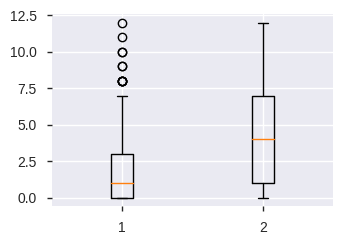

In [0]:
Survived = breast_data[breast_data['Status']==1]['Pos_axillary_nodes']
Not_Survived = breast_data[breast_data['Status']==2]['Pos_axillary_nodes']
fig = plt.figure()
ax = fig.add_subplot(222)
ax.boxplot([Survived,Not_Survived], labels=[1,2])

## 5.2 Univariant Analysis  <a class="anchor" id="univariant Analysis"></a>

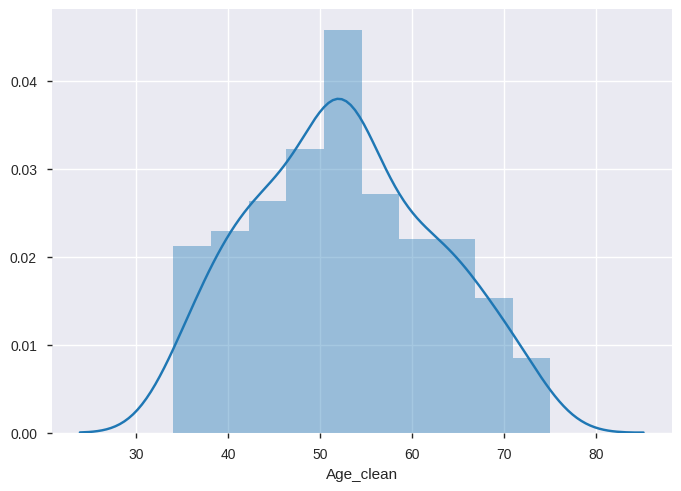

In [53]:
sns.distplot(breast_data['Age_clean'],bins=10)
#sns.FacetGrid(breast_data , hue = 'Status' , height = 5).map(sns.distplot , 'Age_clean').add_legend();
plt.show();

**Observation**<br>
Maximum patients fall under 50 to 55 age category.

**Histogram chart for pos_axillary_nodes**

(array([161.,  20.,  20.,  13.,   6.,  46.,   7.,   6.,   3.,   5.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

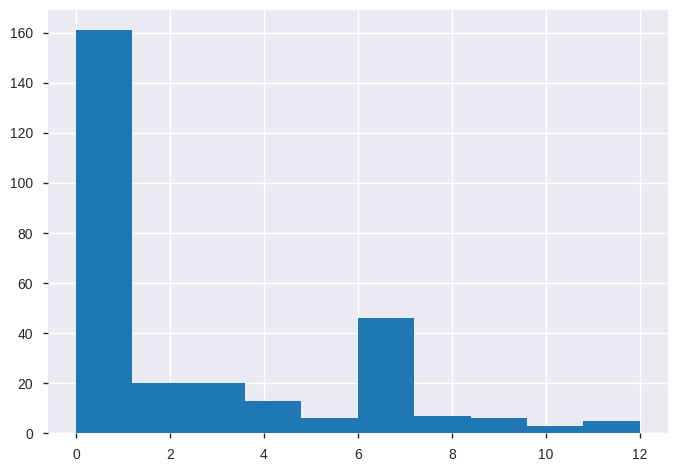

In [54]:
num_bins=10
plt.hist(breast_data['Pos_axillary_nodes'],num_bins)

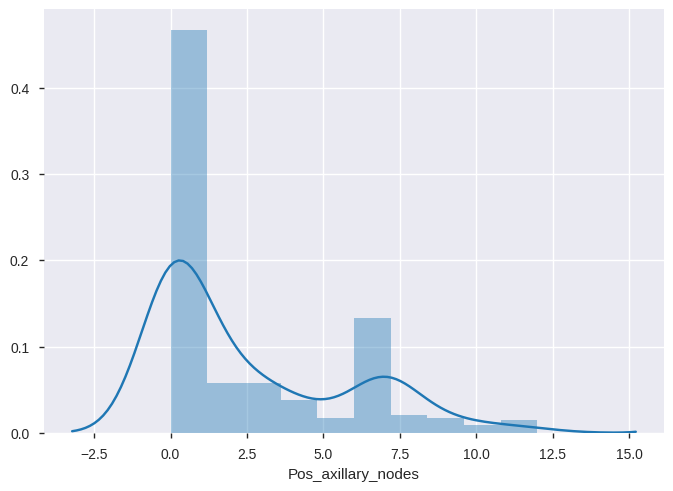

In [55]:
sns.distplot(breast_data['Pos_axillary_nodes'],num_bins)

**Observation**<br>
Maximum Pos_axillary nodes are dense near to 0 and 1

**Histogram for Years_of_Operation**

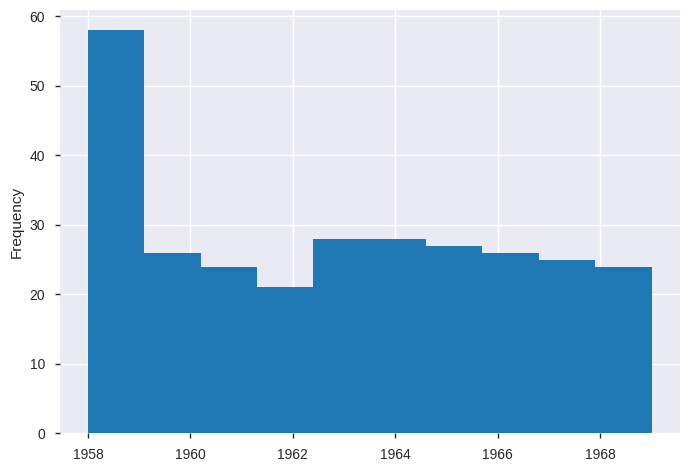

In [56]:
breast_data['Years_of_Operation'].plot.hist()

**Observation**<br>
Maximum operations are done in the year 1958.

## 5.3 Years_of_Operation Vs Status<a class="anchor" id="Years_of_Operation Vs Status"></a>

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


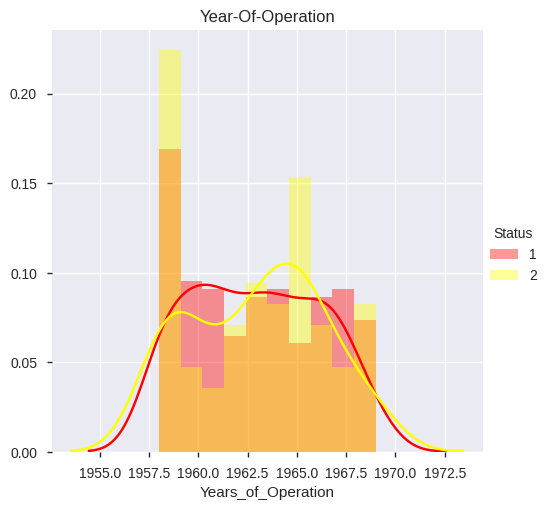

In [57]:
d={'color': ['Red', 'Yellow']}
sns.FacetGrid(breast_data,hue = 'Status',size =5,hue_kws=d).map(sns.distplot,'Years_of_Operation',bins =10).add_legend()
plt.title("Year-Of-Operation")
plt.show()


**Observations**<br>
We observed that lot of data is getting overlapped in this graph, so years_of_operation is not helpful to find out survival status of patients.

## 5.4 Pos_axillary Vs Age<a class="anchor" id="Pos_axillary Vs Age"></a>

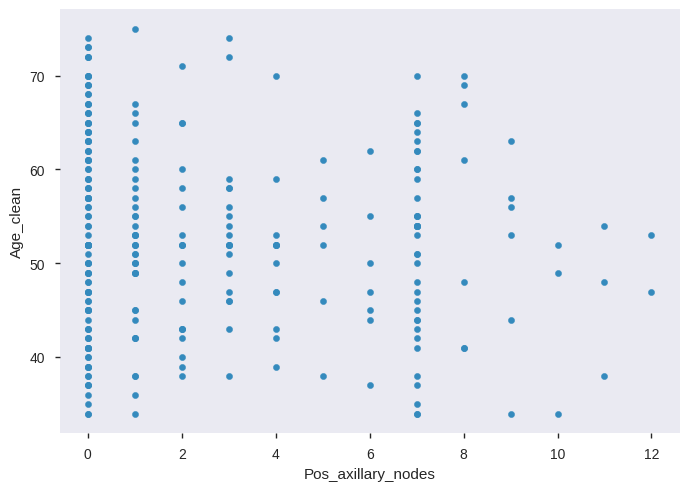

In [58]:
breast_data.plot(kind='scatter', x='Pos_axillary_nodes', y='Age_clean') 
plt.grid()
plt.show()

**Observations**<br>
1.Most of the patients have zero positive auxilary nodes<br>
2.Enable to derive the Survival rate from the plot  



## 5.5 Seaborn swarm plot<a class='anchor' id="Seaborn swarm plot"></a>

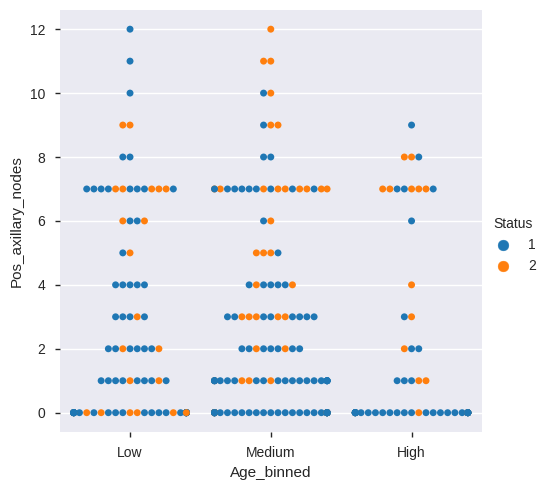

In [70]:
sns.catplot(x="Age_binned", y="Pos_axillary_nodes", hue="Status",kind="swarm", data=breast_data);

## 5.6 Seaborn catplot<a anchor="class" id="Seaborn catplot"></a>

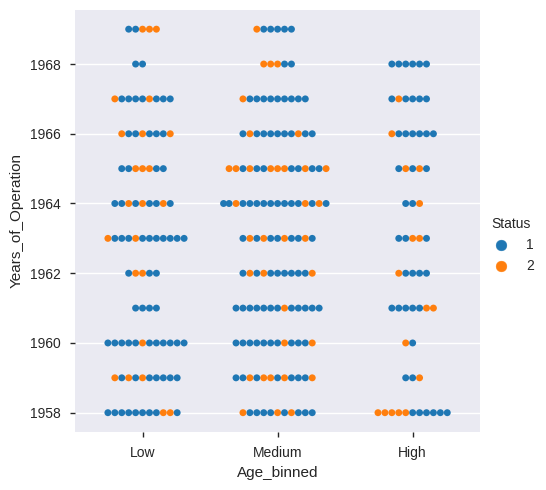

In [71]:
sns.catplot(x="Age_binned", y="Years_of_Operation", hue="Status",kind="swarm", data=breast_data);

**observations**<br>
1.In the year 1961 the survival rate of patients are more<br> 
2.less operations are done in the year 1968

## 5.7 Correlation among all attributes using BoxPlot <a class="anchor" id="Correlation among all attributes using BoxPlot"></a>

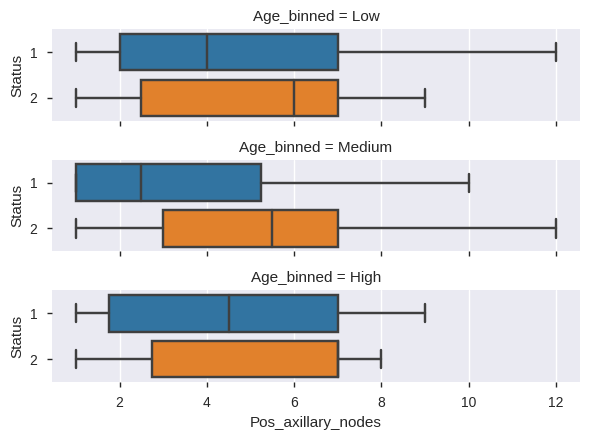

In [72]:
g = sns.catplot(x="Pos_axillary_nodes", y="Status", row="Age_binned",
                kind="box", orient="h", height=1.5, aspect=4,
                data=breast_data.query("Pos_axillary_nodes>0"))

**Observation**<br>
If pos_axillary nodes <3, more chances of survival for any age group

## 5.8 Correlation among all variables using Heap Map<a class="anchor" id="Correlation among all variables using Heap Map"></a>

In [0]:
breast_data_num=breast_data.select_dtypes(include=['int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d78790908>,
      dtype=object)

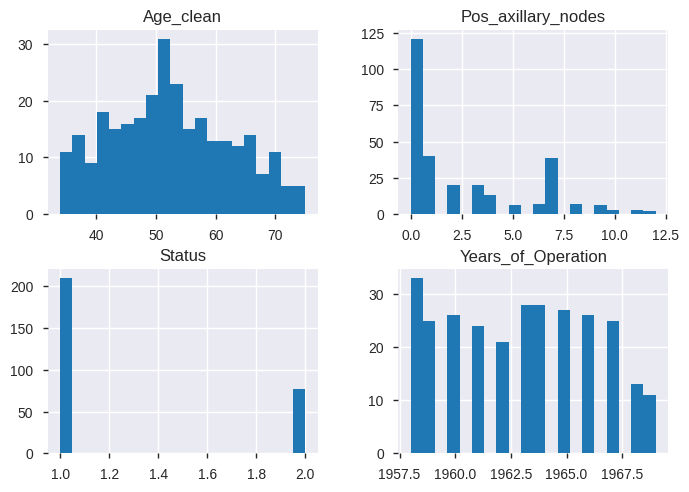

In [63]:
breast_data.hist(bins=20)

In [64]:
breast_corr=breast_data_num.corr()['Status']
breast_corr

Years_of_Operation    0.003932
Pos_axillary_nodes    0.303272
Status                1.000000
Age_clean             0.039804
Name: Status, dtype: float64

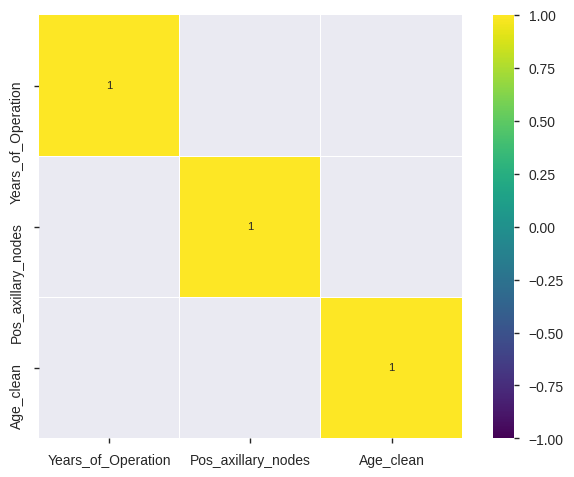

In [65]:
corr=breast_data_num.drop('Status',axis=1).corr()
sns.heatmap(corr[(corr>=0.5)|(corr<=-0.4)],cmap='viridis',vmax=1.0,vmin=-1.0,linewidths=0.1,annot=True,annot_kws={"size":8},square=True)


**Observations**<br>
1.Age_clean and Pos_axillary_nodes has a negative correlation.<br>
2.Age_clean and Year_of_Operation has a postive correlation.<br>
3.Pos_axillary_nodes and Year_of_Operation has a postive correlation<br>

# 6.Analysis through questions<a class="anchor" id="Analysis through questions"></a>

## 6.1 Of all patients how many survived less than 5 years and more than 5 years or longer<a class="anchor" id ="Of all patients how many survived less than 5 years and more than 5 years or longer"></a>

In [66]:
breast_data['Status'].value_counts()

1    210
2     77
Name: Status, dtype: int64

In [67]:
breast_data['Status'].value_counts(normalize=True).round(2)

1    0.73
2    0.27
Name: Status, dtype: float64

## 6.2 Bar graph to find the frequency of people survived less than 5 years and more<a anchor="class" id="Bar graph to find the frequency of people survived less than 5 years and more"></a>

Text(0.5, 1.0, 'Count plot for survived.')

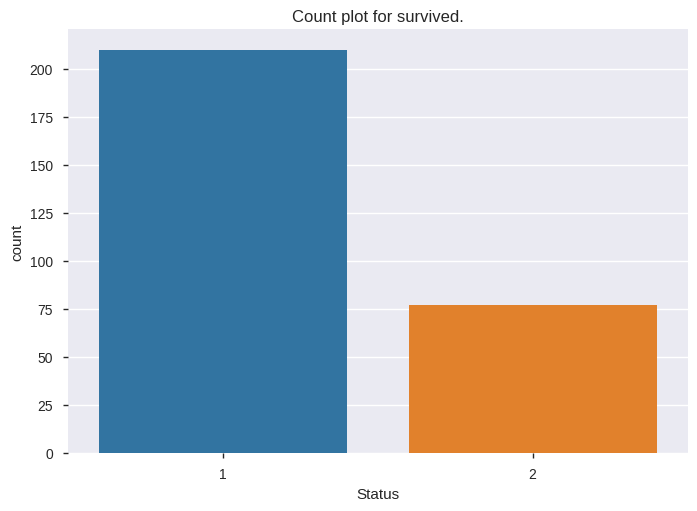

In [68]:
sns.countplot(x='Status', data=breast_data).set_title('Count plot for survived.')

## 6.3 Divide the age into different group by using binning<a class="anchor" id="Divide the age into different group by using binning"></a>

 **Dividing the age into different group by using binning, we idenified a three levels of age groups and dervied a new column Age_binned** 

In [69]:
bins=np.linspace(min(breast_data['Age_clean']),max(breast_data['Age_clean']),4)
group_names=['Low','Medium','High']
breast_data['Age_binned']=pd.cut(breast_data['Age_clean'],bins,labels=group_names,include_lowest=True)
bins

array([34.        , 47.66666667, 61.33333333, 75.        ])

## 6.4 Finding the percentage of different age groups patients and how many patients survived 5yrs or longer<a class="anchor" id="Finding the percentage of different age groups patients and how many patients survived 5yrs or longer"></a>

In [73]:
breast_data.groupby(['Status','Age_binned'])['Status'].count()

Status  Age_binned
1       Low           70
        Medium        97
        High          43
2       Low           24
        Medium        36
        High          17
Name: Status, dtype: int64

In [74]:
df2=breast_data.loc[(breast_data.Age_binned == 'Low')&(breast_data['Status']==1)].count()/breast_data[breast_data.Age_binned == 'Low'].count()
print("% low age people survived",df2['Age_clean'].round(2))
df3=breast_data.loc[(breast_data.Age_binned == 'Medium')&(breast_data['Status']==1)].count()/breast_data[breast_data.Age_binned == 'Medium'].count()
print("% medium age people survived",df3['Age_clean'].round(2))
df4=breast_data.loc[(breast_data.Age_binned == 'High')&(breast_data['Status']==1)].count()/breast_data[breast_data.Age_binned == 'High'].count()
print("% high age people survived",df4['Age_clean'].round(2))

% low age people survived 0.74
% medium age people survived 0.73
% high age people survived 0.72


**Observation**<br>
As the age increases, percentage of survival rate decreases. Reduction factor is also not that significant  

**Factor Plot Age vs Status ** 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Factor plot for Age')

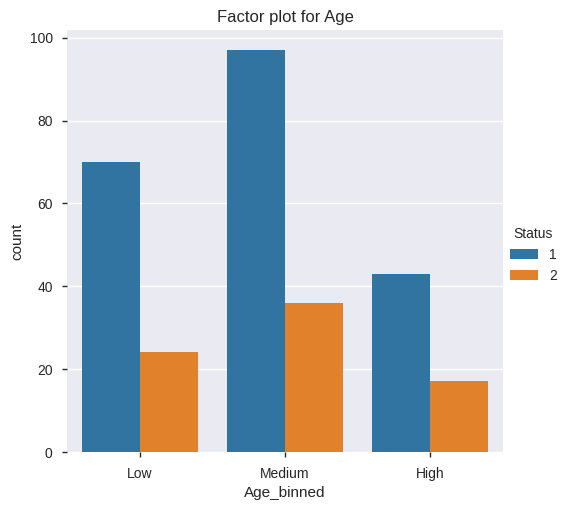

In [75]:
sns.factorplot('Age_binned', hue='Status', kind='count', data=breast_data);
plt.title('Factor plot for Age')

**Observation**<br>
we identified that at mid age group (47-65) have the most patients with breast cancer and also survived most in terms of numbers. 

## 6.5 How many patients survived whose pos_axillary nodes less than 5<a class="anchor" id="How many survived whose pos_axillary nodes less than 5"></a>

In [77]:
nodes_filter=[0,1,2,3,4,5]
status_filter=[1,2]
#breast_data.isin(fill).counts()

breast=breast_data[(breast_data.Status.isin(status_filter) & breast_data.Pos_axillary_nodes.isin(nodes_filter))]
breast
breast['Status'].value_counts()

1    175
2     45
Name: Status, dtype: int64

**Observation**<br>
 Less axillary_nodes more likely to be survived more than 5years and longer.

In [78]:
nodes_filter=[6,7,8,9,10,11,12,13,14,15]
status_filter=[1,2]
#breast_data.isin(fill).counts()

breast=breast_data[(breast_data.Status.isin(status_filter) & breast_data.Pos_axillary_nodes.isin(nodes_filter))]
breast
breast['Status'].value_counts()

1    35
2    32
Name: Status, dtype: int64

**Obeservations**<br>
As the number of axillary nodes increase, chances of survival become less<br> 
There is postive cor-relation between Status and Pos_axillary_nodes

## 6.6 Under which pos_axillary-nodes maximum patients identified<a class=" Under which pos_axillary-nodes maximum patients identified "></a>  

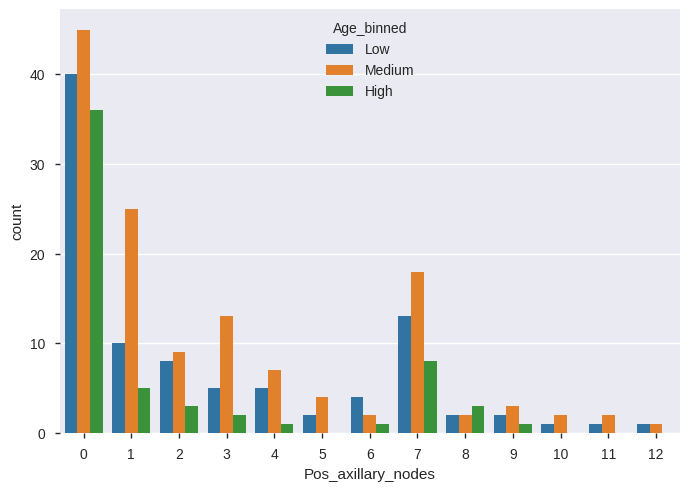

In [79]:
sns.countplot('Pos_axillary_nodes',data=breast_data, hue='Age_binned')

**Observations**<br>
Maximum patients are scatterd at pos_axillary_node zero and likely medium age group patients are more  

## 6.7 Whats the survival rate as the pos_auxillary_nodes increases <a class="anchor" id="Whats the survival rate as the pos_auxillary_nodes increases"></a>

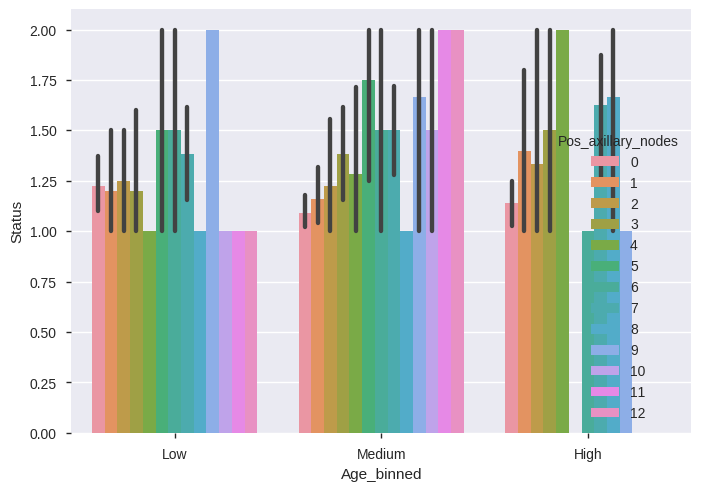

In [80]:
sns.barplot(x = "Age_binned", y = "Status", hue = "Pos_axillary_nodes", data = breast_data)
plt.show()

**Observations**<br>
1.Low age people are likely to be survived more than 5years and longer than remaining age group people<br>
2.As Pos_axillary_nodes increase survival rate decreases

## 7.Final Conclusion <a class="anchor" id="Final Conclusion"></a>

Finally, it can be concluded that if pos_axillary_nodes count is less then there are chances of patient survival for more than 5 years.
Maximum detection of breast cancer happens to be at "Medium" age group.